In [1]:
import pandas as pd
import numpy as np
from raceplotly.plots import barplot

data = pd.read_csv('eras_tour_tracker.csv')
albums = pd.read_excel('eras_tour_tracker.xlsx', sheet_name='Sheet1', engine='openpyxl')
data = data[['CITY','Surprise Song 🎸', 'Surprise Song 🎹']]
data.head()

data['Surprise Song 🎸'] = data['Surprise Song 🎸'].map(lambda x: x.lower())
data['Surprise Song 🎹'] = data['Surprise Song 🎹'].map(lambda x: x.lower())

In [2]:
albums['Album'] = albums['Album'].map(lambda x: str(x).replace(' (Deluxe Edition)', '').replace(' (deluxe edition)', '').replace(' (deluxe version)', '') \
                                        .replace(' (Platinum Edition)', '').replace(' TV', '').replace(' (3am Edition)', '') \
                                        .replace(' (Lavender Edition)', '').replace(' (The Til Dawn Edition)', '').replace(' (The More Lover Chapter)', '') \
                                        .replace(': The Anthology', '')
                                       )

albums['Album'] = np.where(albums.Album.str.contains("SINGLE:"), "SINGLE", albums.Album)
albums['Album'] = np.where(albums.Album.str.contains("COLLAB:"), "COLLAB", albums.Album)
albums['Album'] = np.where(albums.Album.str.contains("COVER:"), "COVER", albums.Album)
albums['Album'] = np.where(albums.Album.str.contains("WRITER ONLY:"), "WRITER", albums.Album)
# albums['Album'] = np.where(albums.Album.str.contains("COVER:"), "COVER", albums.Album)

# [album[:6] for album in albums['Album'] if album[:7] == 'SINGLE:']

albums.head()

,Album,Song
0,Debut (Taylor Swift),Tim McGraw
1,Debut (Taylor Swift),Picture to Burn
2,Debut (Taylor Swift),Teardrops on My Guitar
3,Debut (Taylor Swift),A Place in This World
4,Debut (Taylor Swift),Cold as You


In [3]:
albums['Song'] = albums['Song'].map(lambda x: str(x).replace(' TV', '').replace(' FTV', '')#.replace(' (deluxe version)', '') \
                                        # .replace(' (Platinum Edition)', '').replace(' TV', '').replace(' (3am Edition)', '') \
                                        # .replace(' (Lavender Edition)', '').replace(' (The Til Dawn Edition)', '').replace(' (The More Lover Chapter)', '') \
                                        # .replace(': The Anthology', '')
                                       )

albums['Song'] = albums['Song'].map(lambda x: x.lower())

# albums['Song'] = np.where(albums.Song.str.contains(" (w/"), 'hi', albums.Song)
# albums['Album'] = np.where(albums.Album.str.contains("COLLAB:"), "COLLAB", albums.Album)
# albums['Album'] = np.where(albums.Album.str.contains("COVER:"), "COVER", albums.Album)
# albums['Album'] = np.where(albums.Album.str.contains("WRITER ONLY:"), "WRITER", albums.Album)
# albums['Album'] = np.where(albums.Album.str.contains("COVER:"), "COVER", albums.Album)

# [album[:6] for album in albums['Album'] if album[:7] == 'SINGLE:']

albums.head()

,Album,Song
0,Debut (Taylor Swift),tim mcgraw
1,Debut (Taylor Swift),picture to burn
2,Debut (Taylor Swift),teardrops on my guitar
3,Debut (Taylor Swift),a place in this world
4,Debut (Taylor Swift),cold as you


In [4]:
data2 = data.copy(deep=True)

In [5]:
ss1 = data.merge(albums, left_on="Surprise Song 🎸", right_on="Song", how="left")

In [6]:
ss2 = data.merge(albums, left_on="Surprise Song 🎹", right_on="Song", how="left")

In [7]:
all_albums = pd.concat([ss1, ss2])

In [10]:
for alb in all_albums['Album'].unique():
    print(alb)
    all_albums[alb] = all_albums['Album'] == alb
    all_albums[alb] = all_albums[alb].cumsum()

folklore
Debut (Taylor Swift)
evermore
Red
Lover
Fearless
Speak Now
Midnights
1989
Reputation
SINGLE


In [17]:
all_albums #.sort_values('CITY')

,CITY,Surprise Song 🎸,Surprise Song 🎹,Album,Song,folklore,Debut (Taylor Swift),evermore,Red,Lover,Fearless,Speak Now,Midnights,1989,Reputation,SINGLE,color
0,17-Mar-23,mirrorball,tim mcgraw,folklore,mirrorball,1,0,0,0,0,0,0,0,0,0,0,"rgb(139, 82, 186)"
1,17-Mar-23,this is me trying,state of grace,folklore,this is me trying,2,0,0,0,0,0,0,0,0,0,0,"rgb(139, 82, 186)"
2,24-Mar-23,our song,snow on the beach,Debut (Taylor Swift),our song,2,1,0,0,0,0,0,0,0,0,0,"rgb(114, 194, 116)"
3,25-Mar-23,cowboy like me,white horse,evermore,cowboy like me,2,1,1,0,0,0,0,0,0,0,0,"rgb(21, 201, 209)"
4,31-Mar-23,sad beautiful tragic,ours,Red,sad beautiful tragic,2,1,1,1,0,0,0,0,0,0,0,"rgb(76, 155, 146)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,4-Aug-23,our song,you are in love,1989,you are in love,5,11,7,17,7,12,16,9,12,5,1,"rgb(136, 174, 128)"
49,5-Aug-23,death by a thousand cuts,"you're on your own, kid",Midnights,"you're on your own, kid",5,11,7,17,7,12,16,10,12,5,1,"rgb(76, 13, 223)"
50,7-Aug-23,dress,exile,folklore,exile,6,11,7,17,7,12,16,10,12,5,1,"rgb(139, 82, 186)"
51,8-Aug-23,i know places,king of my heart,Reputation,king of my heart,6,11,7,17,7,12,16,10,12,6,1,"rgb(191, 97, 17)"


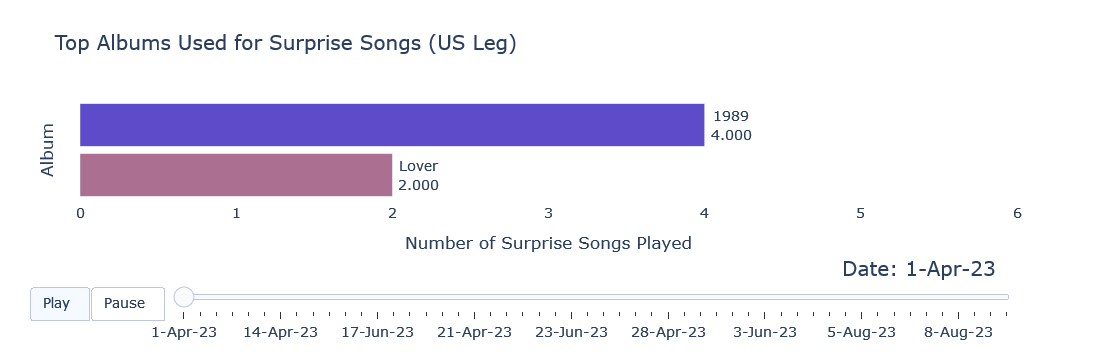

In [18]:
my_raceplot = barplot(all_albums,
                      item_column='Album',
                      value_column='folklore',
                      time_column='CITY')

my_raceplot.plot(title = 'Top Albums Used for Surprise Songs (US Leg)',
                 item_label = 'Album',
                 value_label = 'Number of Surprise Songs Played',
                 frame_duration = 800)

In [ ]:
# fix date column to be in usable format and sort by it
# create one column that gets current value of the relevant album... ONE column for all albums 